In [3]:
import datetime as dt
import logging

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import xarray as xr

logging.basicConfig(level=logging.DEBUG)
logging.getLogger("matplotlib").setLevel(logging.WARN)

In [2]:
forecast_date = dt.date(1989, 1, 6)
arr = np.load(forecast_date.strftime("%Y_%m_%d.npy"))
xc = [-5387.5 + n * 25 for n in range(432)]
yc = [-5387.5 + n * 25 for n in range(432)]
dates = [forecast_date + dt.timedelta(days=n) for n in range(93)]

In [3]:
arr.shape

(432, 432, 93, 1)

Create some variation to simulate use of an ensemble of runs

In [4]:
data = []

for i in range(10):
    v = np.zeros(arr.shape)
    logging.info("Iteration {}".format(i))
    data.append(arr + v)
    
data = np.array(data)

INFO:root:Iteration 0
INFO:root:Iteration 1
INFO:root:Iteration 2
INFO:root:Iteration 3
INFO:root:Iteration 4
INFO:root:Iteration 5
INFO:root:Iteration 6
INFO:root:Iteration 7
INFO:root:Iteration 8
INFO:root:Iteration 9


In [5]:
data.shape

(10, 432, 432, 93, 1)

In [6]:
mean = data.mean(axis=0)
std = data.std(axis=0)

#### CF Creation of Dataset

The intention is to add the necessary parameters to the below dataset call in xarray that will create a CF compliant file. 

(432, 432, 93, 2)

(432, 432, 93)

In [11]:
ds = xr.Dataset(
    data_vars=dict(
        mean=(["xc", "yc", "leadtime"], mean.squeeze()),
        std=(["xc", "yc", "leadtime"], std.squeeze()),       
    ),
    coords=dict(
        xc=xc,
        yc=yc,
        leadtime=dates,
        forecast_date=forecast_date,
    )
)

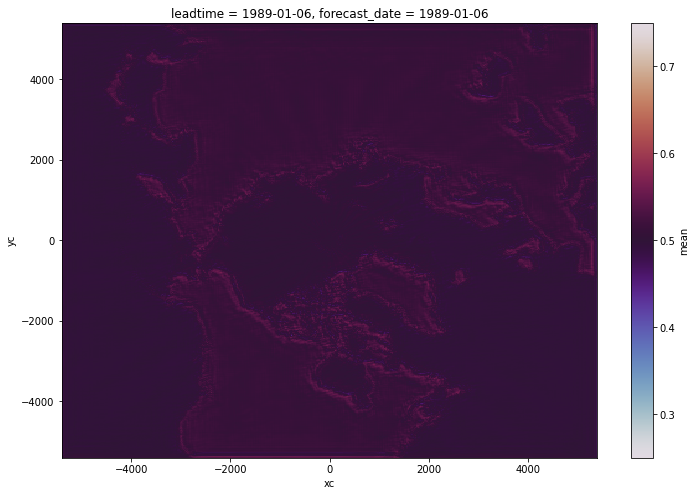

In [14]:
ds.sel(leadtime=dates[0]).data_vars["mean"].plot(x="xc", y="yc", size=8, cmap="twilight", vmin=0.25, vmax=0.75)

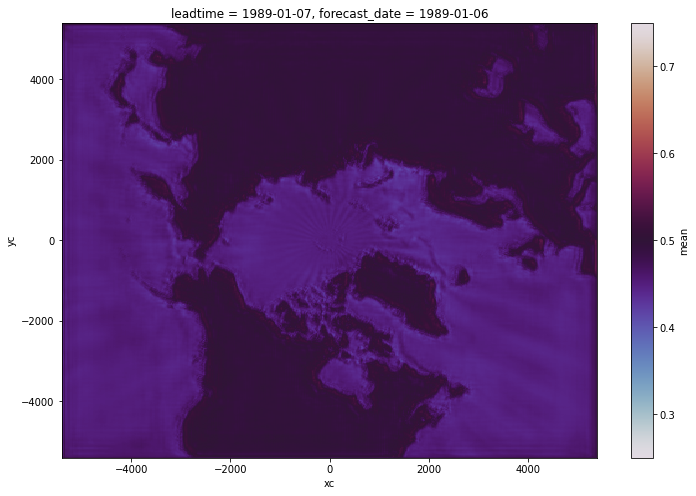

In [15]:
ds.sel(leadtime=dates[1]).data_vars["mean"].plot(x="xc", y="yc", size=8, cmap="twilight", vmin=0.25, vmax=0.75)